In [7]:
import tensorflow as tf
import numpy as np

# 使用numpy生成100个随机点
x_data = np.random.rand(100)
y_data = x_data * 0.1 + 0.2

# 构造一个线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k * x_data + b

# 使用L2代价函数
loss = tf.reduce_mean(tf.square(y_data - y), reduction_indices = 0, keep_dims = False)
# 定义一个梯度下降算法来进行训练
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)       # 初始化变量
    for step in range(201):
        sess.run(train)
        if step % 20 == 0:
            print(step, sess.run(loss))

0 0.015450959
20 6.5129296e-07
40 2.1812241e-07
60 7.30535e-08
80 2.4466114e-08
100 8.19454e-09
120 2.7448528e-09
140 9.1938207e-10
160 3.0786423e-10
180 1.03287684e-10
200 3.4653166e-11


## linear regression

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

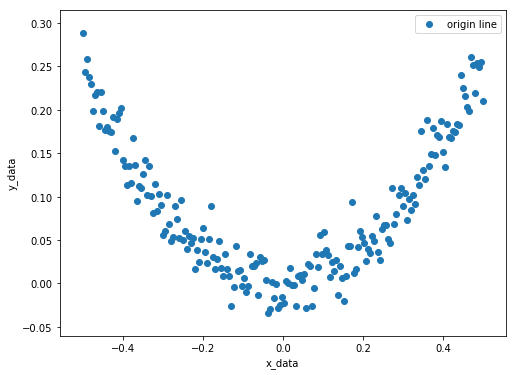

In [30]:
# 使用 numpy 生成200个随机点
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]    # 通过 np.newaxis 增加一维
noise = np.random.normal(0, 0.02, x_data.shape)        # 生成噪声
y_data = np.square(x_data) + noise

fig = plt.figure(figsize = (8, 6))
plt.scatter(x_data, y_data, label = 'origin line')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.legend()

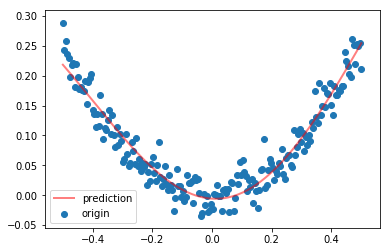

In [32]:
# 定义两个 placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义神经网络中间层
Weights_L1 = tf.Variable(tf.random.normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
z1 = tf.matmul(x, Weights_L1) + biases_L1
L1 = tf.nn.tanh(z1)

# 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random.normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
z2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(z2)

# 定义 L2 代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 使用梯度下降法进行优化
train_step = tf.train.GradientDescentOptimizer(0.1)
train = train_step.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train, feed_dict = {
            x: x_data,
            y: y_data
        })        # 进行训练
        
        # 获得预测值
        prediction_value = sess.run(prediction, feed_dict = {x: x_data})

plt.plot(x_data, prediction_value, label = 'prediction', lw = 2, c = 'r', alpha = 0.5)
plt.scatter(x_data, y_data, label = 'origin')
plt.legend()